<div style="widelta_th: 100%; overflow: hidden;">
    <div style="display: block;margin-left: auto;margin-right: auto; widelta_th: 100%;"><img src="./logo_dei.png"  /></div>
</div>

<h2 style="font-family:Avantgarde; font-size:2em; text-align: center;">Projeto 2 - Fusão de Informação e Análise de Dados</h2>


<h4 style="font-family:Avantgarde; font-size:1.75em; text-align: center;">Mestrado em Engenharia e Ciência de Dados</h4>
<h4 style="font-family:Avantgarde; font-size:1.3em; text-align: center;">Ano Letivo 2023/2024</h4>

<p style = "font-family:Avantgarde; font-size:1.1em; text-align: center;"> <b>Mariana Lopes Paulino - 2020190448</b></p>
<p style = "font-family:Avantgarde; font-size:1.1em; text-align: center;"> <b>Rui Alexandre Coelho Tapadinhas - 2018283200</b></p>

Screening

▪ x1 Gender {0,1} = { Female, Male} 

▪ X2 Age [34 .. 99]

▪ X3 Marital status {0,1} = { single, married} 

▪ X4 Vaccinated {0,1} = { No, Yes} 

▪ X5 Breathing difficulty {0,1,2,3} = { none, some, moderate, high}

Medidas

▪ X6 Heart Rate  [38.. 272]

▪ X7 Blood pressure  [115.. 164]

▪ X8 Temperature  [36.00  ..  38.98]

Conhecimento

▪ X9 Clinical Guidelines  A rule based on the breathing difficulty  and the temperature

Decisão

▪ T Decision Final decision {0,1} = { return home, stay at hospital }

<h3 style="font-family:Avantgarde; font-size:2em;">0. Import Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


<h3 style="font-family:Avantgarde; font-size:2em;">1. Load and Pre Proccess Data</h3>

In [2]:
data = pd.read_csv("Meta2COVID.txt", sep="   ", engine="python")
data.columns = ["Gender", "Age", "MaritalStatus", "Vaccinated", "BreathingDifficulty", "HeartRate", "BloodPressure", "Temperature", "Decision"]
data

,Gender,Age,MaritalStatus,Vaccinated,BreathingDifficulty,HeartRate,BloodPressure,Temperature,Decision
0,0.0,82.0,1.0,0.0,3.0,79.449753,132.81408,36.832310,1.0
1,1.0,65.0,0.0,0.0,3.0,85.470779,137.33184,37.580005,1.0
2,1.0,64.0,0.0,0.0,1.0,51.561135,149.29652,36.959370,0.0
3,0.0,85.0,1.0,0.0,2.0,89.008377,121.42689,37.744883,1.0
4,1.0,59.0,0.0,0.0,1.0,71.582639,164.88202,36.506535,0.0
...,...,...,...,...,...,...,...,...,...
594,1.0,60.0,1.0,0.0,1.0,72.236092,135.37860,36.099066,0.0
595,0.0,56.0,1.0,0.0,1.0,74.460422,144.13974,38.274403,1.0
596,0.0,55.0,0.0,1.0,3.0,43.010392,118.61472,38.173531,0.0
597,1.0,60.0,0.0,0.0,2.0,61.320137,135.02002,37.818543,1.0


In [3]:
data['Gender'] = data['Gender'].astype(int)
data['Age'] = data['Age'].astype(int)
data['MaritalStatus'] = data['MaritalStatus'].astype(int)
data['Vaccinated'] = data['Vaccinated'].astype(int)
data['BreathingDifficulty'] = data['BreathingDifficulty'].astype(int)
#data['HeartRate'] = data['HeartRate'].astype(int)
#data['BloodPressure'] = data['BloodPressure'].astype(int)
#data['Temperature'] = data['Temperature'].astype(int)
data['Decision'] = data['Decision'].astype(int)

data

,Gender,Age,MaritalStatus,Vaccinated,BreathingDifficulty,HeartRate,BloodPressure,Temperature,Decision
0,0,82,1,0,3,79.449753,132.81408,36.832310,1
1,1,65,0,0,3,85.470779,137.33184,37.580005,1
2,1,64,0,0,1,51.561135,149.29652,36.959370,0
3,0,85,1,0,2,89.008377,121.42689,37.744883,1
4,1,59,0,0,1,71.582639,164.88202,36.506535,0
...,...,...,...,...,...,...,...,...,...
594,1,60,1,0,1,72.236092,135.37860,36.099066,0
595,0,56,1,0,1,74.460422,144.13974,38.274403,1
596,0,55,0,1,3,43.010392,118.61472,38.173531,0
597,1,60,0,0,2,61.320137,135.02002,37.818543,1


In [4]:
data.describe()

,Gender,Age,MaritalStatus,Vaccinated,BreathingDifficulty,HeartRate,BloodPressure,Temperature,Decision
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,0.525876,64.667780,0.509182,0.489149,1.497496,67.777811,140.799646,37.475296,0.322204
std,0.499747,12.191949,0.500333,0.500300,1.124184,24.128167,14.514810,0.848428,0.467711
min,0.000000,26.000000,0.000000,0.000000,0.000000,38.000000,115.096690,35.839809,0.000000
25%,0.000000,56.000000,0.000000,0.000000,0.000000,53.457034,128.097870,36.777783,0.000000
50%,1.000000,64.000000,1.000000,0.000000,1.000000,66.082875,140.709020,37.473156,0.000000
75%,1.000000,72.000000,1.000000,1.000000,3.000000,78.608148,153.610790,38.172055,1.000000
max,1.000000,107.000000,1.000000,1.000000,3.000000,272.178480,164.945760,39.126040,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               599 non-null    int64  
 1   Age                  599 non-null    int64  
 2   MaritalStatus        599 non-null    int64  
 3   Vaccinated           599 non-null    int64  
 4   BreathingDifficulty  599 non-null    int64  
 5   HeartRate            599 non-null    float64
 6   BloodPressure        599 non-null    float64
 7   Temperature          599 non-null    float64
 8   Decision             599 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 42.2 KB


In [6]:
data.insert(8, 'ClinicalGuidelines', '0')
data['ClinicalGuidelines'] = np.where((data['BreathingDifficulty'] >= 2) & (data['Temperature'] > 37.8), '1', '0')

data

,Gender,Age,MaritalStatus,Vaccinated,BreathingDifficulty,HeartRate,BloodPressure,Temperature,ClinicalGuidelines,Decision
0,0,82,1,0,3,79.449753,132.81408,36.832310,0,1
1,1,65,0,0,3,85.470779,137.33184,37.580005,0,1
2,1,64,0,0,1,51.561135,149.29652,36.959370,0,0
3,0,85,1,0,2,89.008377,121.42689,37.744883,0,1
4,1,59,0,0,1,71.582639,164.88202,36.506535,0,0
...,...,...,...,...,...,...,...,...,...,...
594,1,60,1,0,1,72.236092,135.37860,36.099066,0,0
595,0,56,1,0,1,74.460422,144.13974,38.274403,0,1
596,0,55,0,1,3,43.010392,118.61472,38.173531,1,0
597,1,60,0,0,2,61.320137,135.02002,37.818543,1,1


In [7]:
# Stay at Hospital
hospital = data[data['Decision'] == 1]
hospital.describe()
#hospital

print("Hospitalized: ", len(hospital))
print("Probability of Hospitalization: ", len(hospital)/len(data))

Hospitalized:  193
Probability of Hospitalization:  0.32220367278797996


In [8]:
# Go Home
home = data[data['Decision'] == 0]
home.describe()
#home

print("Home: ", len(home))
print("Probability of Going Home: ", len(home)/len(data))

Home:  406
Probability of Going Home:  0.67779632721202


<h3 style="font-family:Avantgarde; font-size:2em;">2. Explore Data Visually</h3>

In [9]:
# Correlation Matrix
correlation_matrix = data.corr()
correlation_matrix

,Gender,Age,MaritalStatus,Vaccinated,BreathingDifficulty,HeartRate,BloodPressure,Temperature,ClinicalGuidelines,Decision
Gender,1.000000,-0.014368,0.037504,-0.000547,0.033602,-0.008685,-0.019676,-0.009047,-0.042318,0.268330
Age,-0.014368,1.000000,-0.040757,0.017913,0.039531,-0.039835,-0.001840,-0.026218,0.087235,-0.004951
MaritalStatus,0.037504,-0.040757,1.000000,0.058853,0.036461,0.130028,-0.001888,-0.073385,-0.076608,0.069515
Vaccinated,-0.000547,0.017913,0.058853,1.000000,0.048267,-0.034353,-0.052621,0.034511,0.052895,-0.395954
BreathingDifficulty,0.033602,0.039531,0.036461,0.048267,1.000000,-0.064372,-0.064268,-0.072240,0.426105,0.225756
HeartRate,-0.008685,-0.039835,0.130028,-0.034353,-0.064372,1.000000,0.056736,-0.052568,-0.093416,0.124783
BloodPressure,-0.019676,-0.001840,-0.001888,-0.052621,-0.064268,0.056736,1.000000,-0.048827,-0.042279,-0.110728
Temperature,-0.009047,-0.026218,-0.073385,0.034511,-0.072240,-0.052568,-0.048827,1.000000,0.496476,0.315339
ClinicalGuidelines,-0.042318,0.087235,-0.076608,0.052895,0.426105,-0.093416,-0.042279,0.496476,1.000000,0.276853
Decision,0.268330,-0.004951,0.069515,-0.395954,0.225756,0.124783,-0.110728,0.315339,0.276853,1.000000


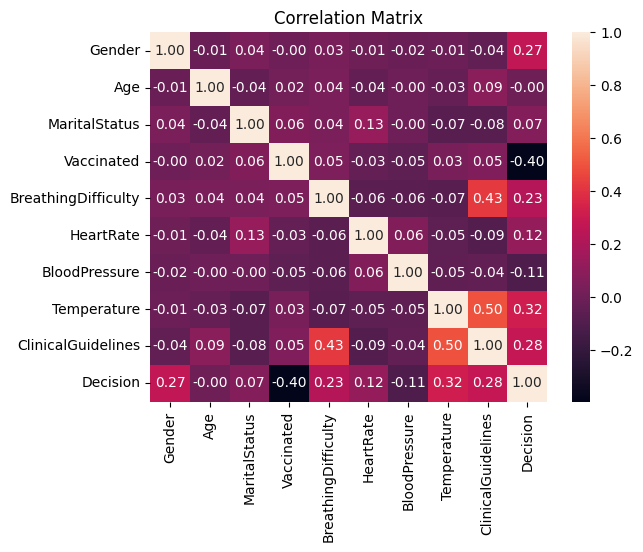

In [10]:
# Heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_11471/1179459891.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Age, hist=True, kde=True, color = 'pink',
/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_11471/1179459891.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

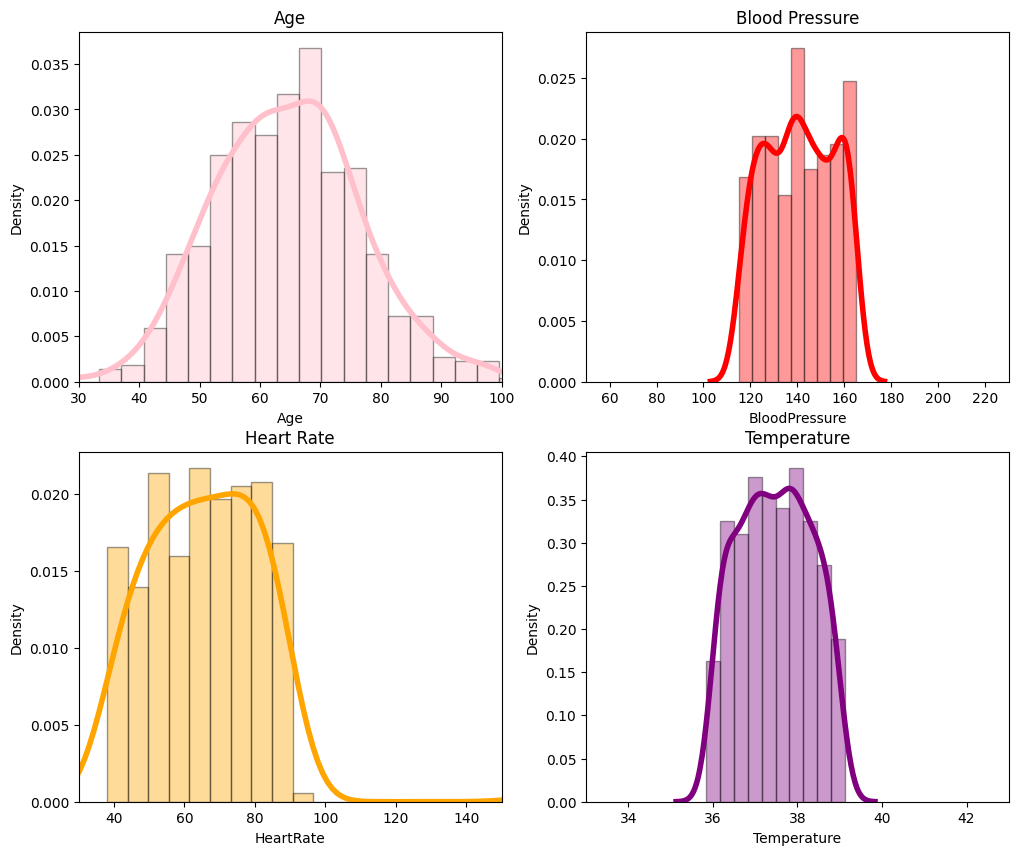

In [11]:
fig,axs = plt.subplots(2,2)
fig.set_size_inches(12, 10)

axs[0,0].set_title('Age')
axs[0,0].set_xlim(30,100)
sns.distplot(data.Age, hist=True, kde=True, color = 'pink', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4,},ax =axs[0,0])

axs[0,1].set_title('Blood Pressure')
axs[0,1].set_xlim(50,230)
sns.distplot(data.BloodPressure, hist=True, kde=True, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},ax =axs[0,1])

axs[1,0].set_title('Heart Rate')
axs[1,0].set_xlim(30,150)

sns.distplot(data.HeartRate, hist=True, kde=True, color = 'orange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},ax =axs[1,0])
            
axs[1,1].set_title('Temperature')
axs[1,1].set_xlim(33,43)
sns.distplot(data.Temperature, hist=True, kde=True, color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},ax =axs[1,1])
#plt.show()

# Save Plot
fig.savefig('Distribuicao.png')

/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_11471/3351309651.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Decision'] == 0].Age, hist=True, kde=True, color='pink',
/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_11471/3351309651.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

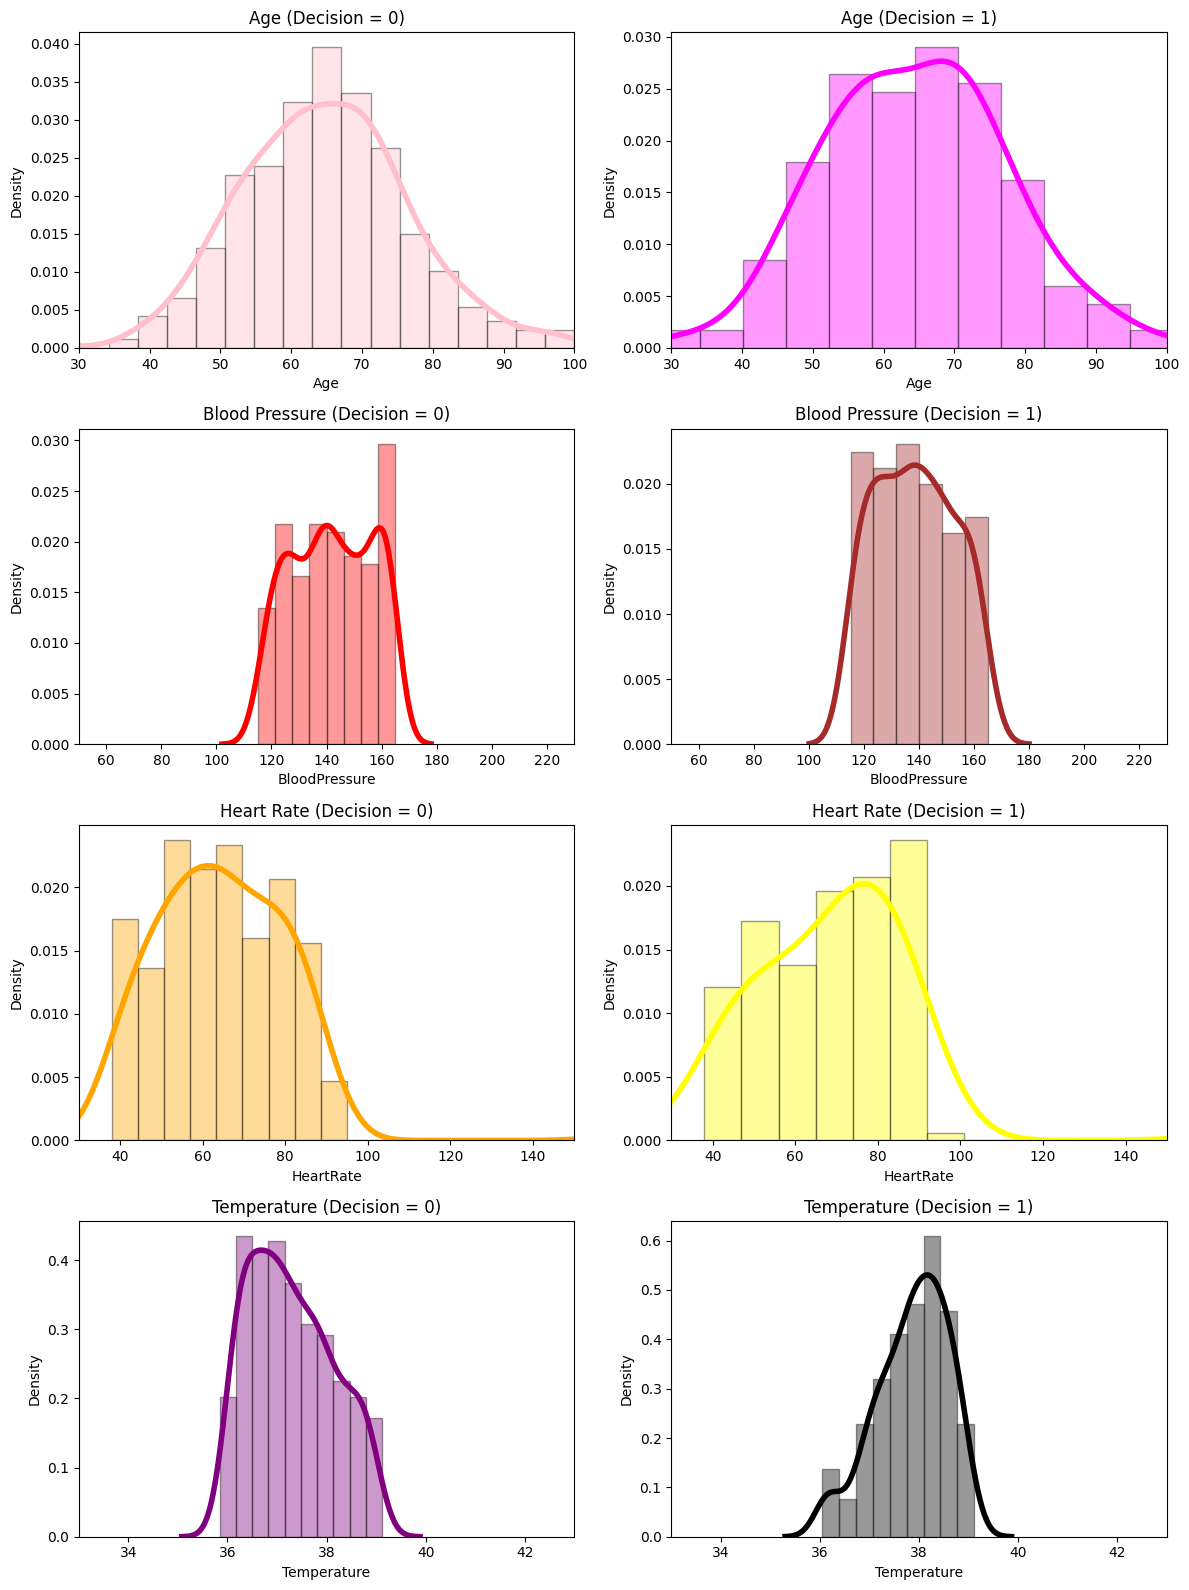

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `data` is your DataFrame and it has the columns 'Age', 'HeartRate', 'BloodPressure', 'Temperature', and 'Decision'

# Create subplots
fig, axs = plt.subplots(4, 2, figsize=(12, 16))

# Plot for Age
sns.distplot(data[data['Decision'] == 0].Age, hist=True, kde=True, color='pink',
             hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 4}, ax=axs[0, 0])
sns.distplot(data[data['Decision'] == 1].Age, hist=True, kde=True, color='magenta',
             hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 4}, ax=axs[0, 1])
axs[0, 0].set_title('Age (Decision = 0)')
axs[0, 1].set_title('Age (Decision = 1)')
axs[0, 0].set_xlim(30, 100)
axs[0, 1].set_xlim(30, 100)

# Plot for Blood Pressure
sns.distplot(data[data['Decision'] == 0].BloodPressure, hist=True, kde=True, color='red',
             hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 4}, ax=axs[1, 0])
sns.distplot(data[data['Decision'] == 1].BloodPressure, hist=True, kde=True, color='brown',
             hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 4}, ax=axs[1, 1])
axs[1, 0].set_title('Blood Pressure (Decision = 0)')
axs[1, 1].set_title('Blood Pressure (Decision = 1)')
axs[1, 0].set_xlim(50, 230)
axs[1, 1].set_xlim(50, 230)

# Plot for Heart Rate
sns.distplot(data[data['Decision'] == 0].HeartRate, hist=True, kde=True, color='orange',
             hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 4}, ax=axs[2, 0])
sns.distplot(data[data['Decision'] == 1].HeartRate, hist=True, kde=True, color='yellow',
             hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 4}, ax=axs[2, 1])
axs[2, 0].set_title('Heart Rate (Decision = 0)')
axs[2, 1].set_title('Heart Rate (Decision = 1)')
axs[2, 0].set_xlim(30, 150)
axs[2, 1].set_xlim(30, 150)

# Plot for Temperature
sns.distplot(data[data['Decision'] == 0].Temperature, hist=True, kde=True, color='purple',
             hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 4}, ax=axs[3, 0])
sns.distplot(data[data['Decision'] == 1].Temperature, hist=True, kde=True, color='black',
             hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 4}, ax=axs[3, 1])
axs[3, 0].set_title('Temperature (Decision = 0)')
axs[3, 1].set_title('Temperature (Decision = 1)')
axs[3, 0].set_xlim(33, 43)
axs[3, 1].set_xlim(33, 43)

# Adjust layout
plt.tight_layout()

# Save the figure
fig.savefig('DistribuicaoDecisoes.png')

# Display the plot
plt.show()


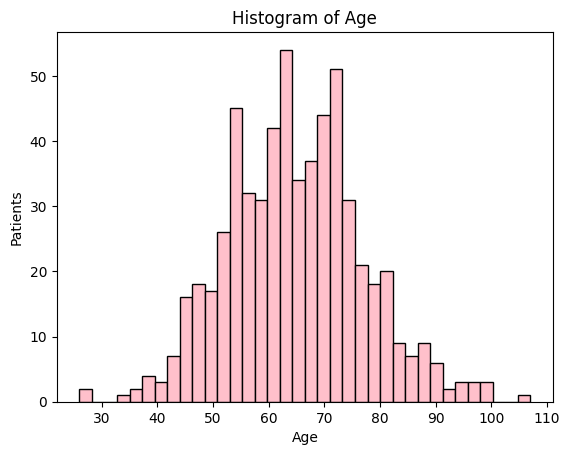

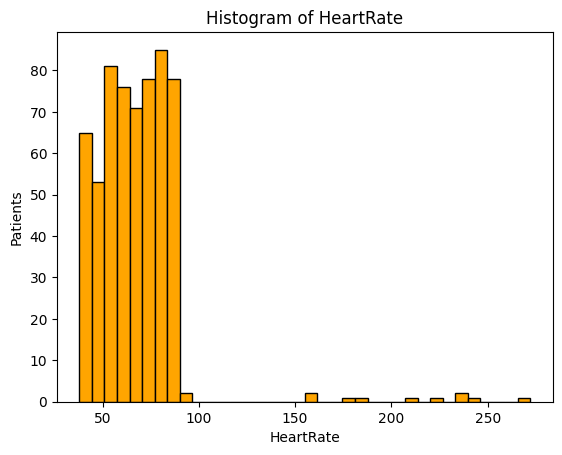

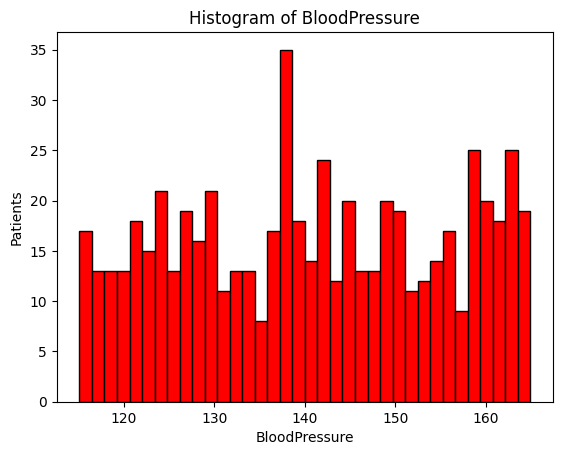

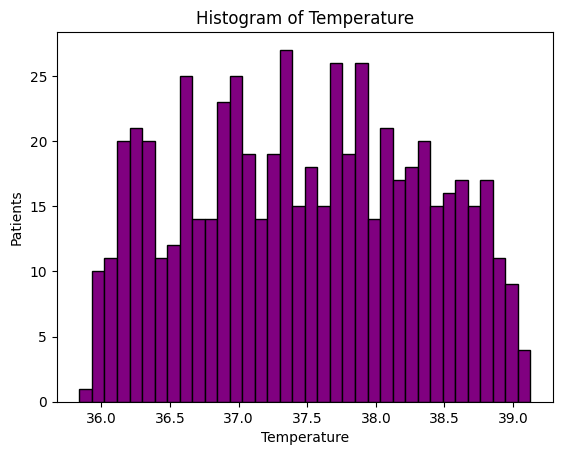

<Figure size 640x480 with 0 Axes>

In [13]:
#Distribuitions of the features
#Matplotlib histogram
plt.hist(data['Age'], color = 'pink', edgecolor = 'black', bins = int(180/5))
# Add labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Patients')
plt.show()

plt.hist(data['HeartRate'], color = 'orange', edgecolor = 'black', bins = int(180/5))
# Add labels
plt.title('Histogram of HeartRate')
plt.xlabel('HeartRate')
plt.ylabel('Patients')
plt.show()

plt.hist(data['BloodPressure'], color = 'red', edgecolor = 'black', bins = int(180/5))
# Add labels
plt.title('Histogram of BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('Patients')
plt.show()

plt.hist(data['Temperature'], color = 'purple', edgecolor = 'black', bins = int(180/5))
# Add labels
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Patients')
plt.show()

#Save the histograms
plt.savefig('Age.png')
plt.savefig('HeartRate.png')
plt.savefig('BloodPressure.png')
plt.savefig('Temperature.png')

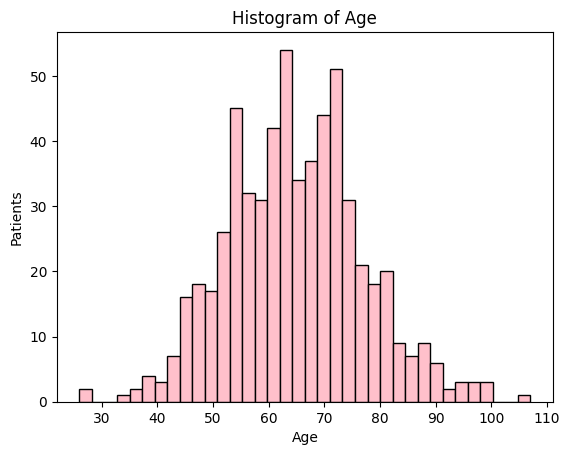

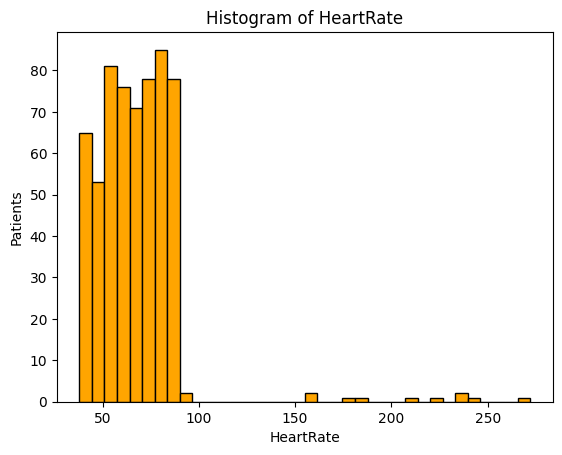

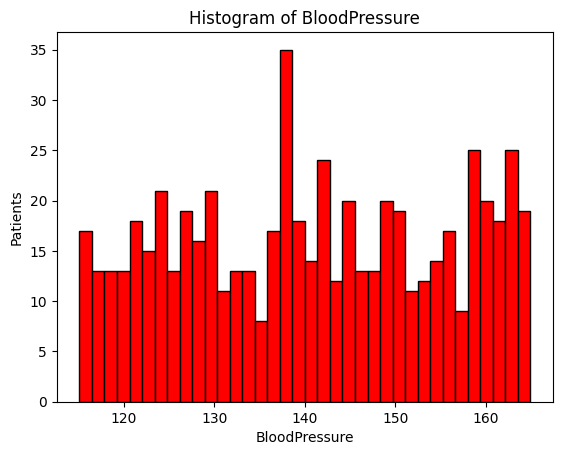

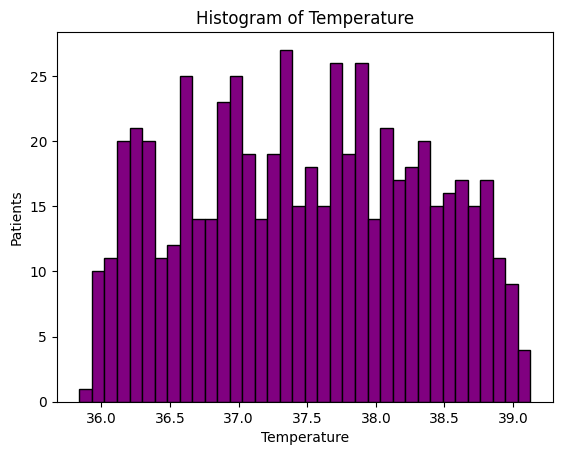

In [14]:
import matplotlib.pyplot as plt

# Histogram of Age
plt.hist(data['Age'], color='pink', edgecolor='black', bins=int(180/5))
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Patients')
plt.savefig('AgeDist.png')  # Save the histogram as Age.png
plt.show()

# Histogram of HeartRate
plt.hist(data['HeartRate'], color='orange', edgecolor='black', bins=int(180/5))
plt.title('Histogram of HeartRate')
plt.xlabel('HeartRate')
plt.ylabel('Patients')
plt.savefig('HeartRateDist.png')  # Save the histogram as HeartRate.png
plt.show()

# Histogram of BloodPressure
plt.hist(data['BloodPressure'], color='red', edgecolor='black', bins=int(180/5))
plt.title('Histogram of BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('Patients')
plt.savefig('BloodPressureDist.png')  # Save the histogram as BloodPressure.png
plt.show()

# Histogram of Temperature
plt.hist(data['Temperature'], color='purple', edgecolor='black', bins=int(180/5))
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Patients')
plt.savefig('TemperatureDist.png')  # Save the histogram as Temperature.png
plt.show()


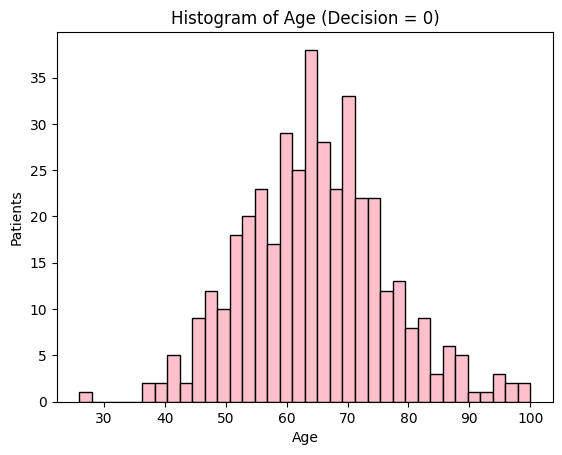

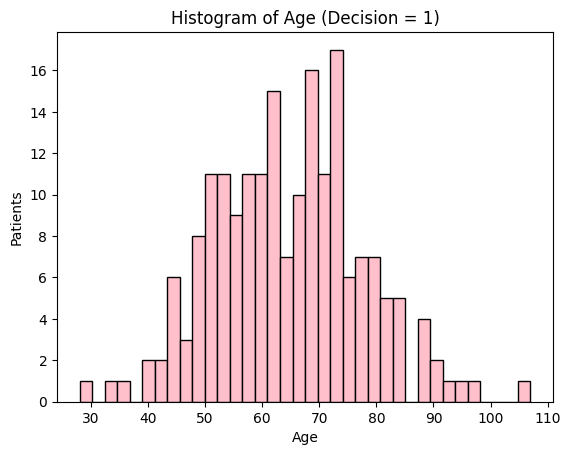

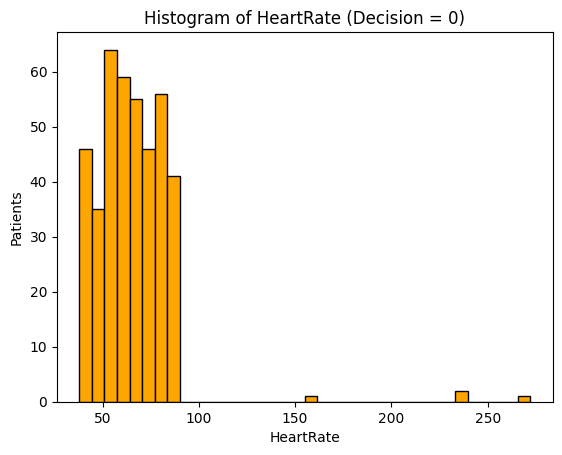

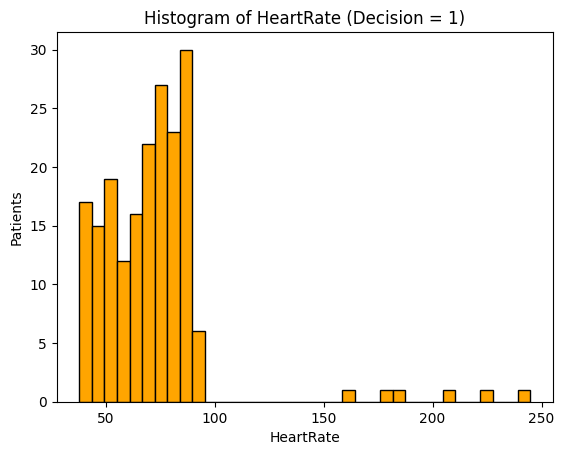

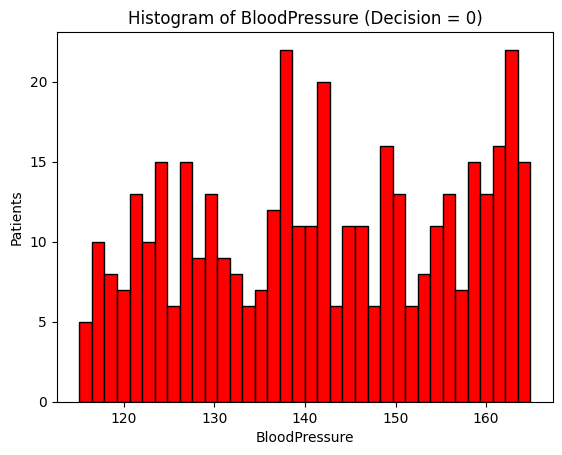

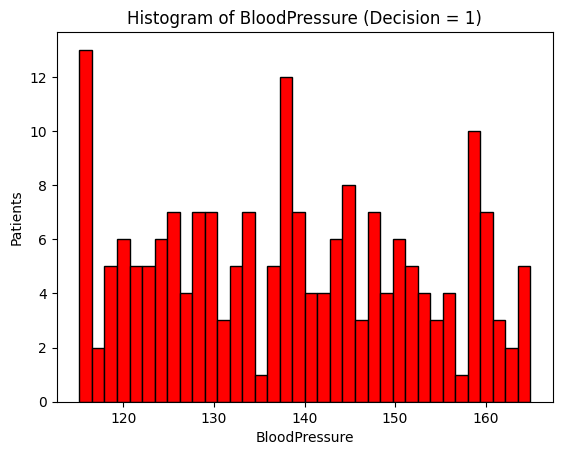

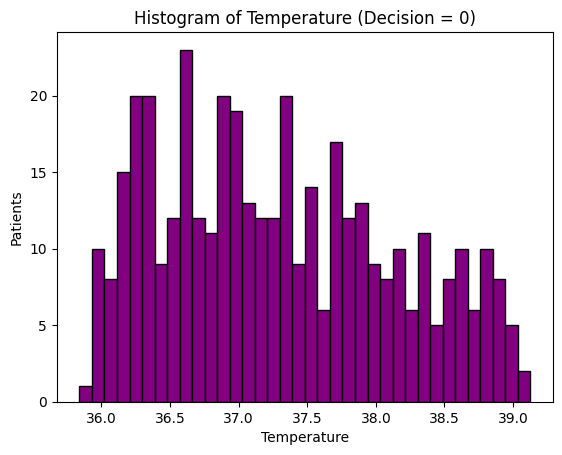

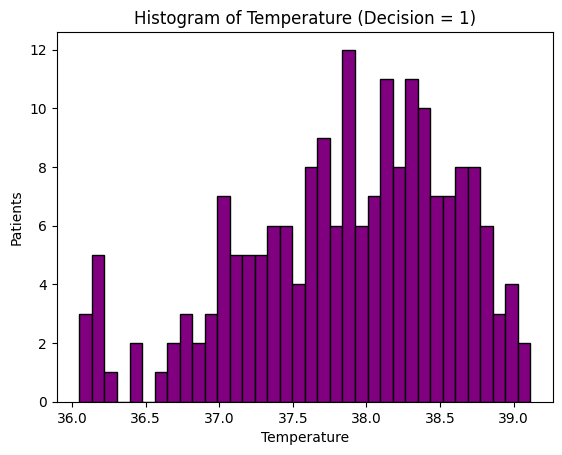

In [15]:
import matplotlib.pyplot as plt

# Histogram of Age for Decision = 0
plt.hist(data[data['Decision'] == 0]['Age'], color='pink', edgecolor='black', bins=int(180/5))
plt.title('Histogram of Age (Decision = 0)')
plt.xlabel('Age')
plt.ylabel('Patients')
plt.savefig('Age_Decision_0.png')  # Save the histogram as Age_Decision_0.png
plt.show()

# Histogram of Age for Decision = 1
plt.hist(data[data['Decision'] == 1]['Age'], color='pink', edgecolor='black', bins=int(180/5))
plt.title('Histogram of Age (Decision = 1)')
plt.xlabel('Age')
plt.ylabel('Patients')
plt.savefig('Age_Decision_1.png')  # Save the histogram as Age_Decision_1.png
plt.show()

# Histogram of HeartRate for Decision = 0
plt.hist(data[data['Decision'] == 0]['HeartRate'], color='orange', edgecolor='black', bins=int(180/5))
plt.title('Histogram of HeartRate (Decision = 0)')
plt.xlabel('HeartRate')
plt.ylabel('Patients')
plt.savefig('HeartRate_Decision_0.png')  # Save the histogram as HeartRate_Decision_0.png
plt.show()

# Histogram of HeartRate for Decision = 1
plt.hist(data[data['Decision'] == 1]['HeartRate'], color='orange', edgecolor='black', bins=int(180/5))
plt.title('Histogram of HeartRate (Decision = 1)')
plt.xlabel('HeartRate')
plt.ylabel('Patients')
plt.savefig('HeartRate_Decision_1.png')  # Save the histogram as HeartRate_Decision_1.png
plt.show()

# Histogram of BloodPressure for Decision = 0
plt.hist(data[data['Decision'] == 0]['BloodPressure'], color='red', edgecolor='black', bins=int(180/5))
plt.title('Histogram of BloodPressure (Decision = 0)')
plt.xlabel('BloodPressure')
plt.ylabel('Patients')
plt.savefig('BloodPressure_Decision_0.png')  # Save the histogram as BloodPressure_Decision_0.png
plt.show()

# Histogram of BloodPressure for Decision = 1
plt.hist(data[data['Decision'] == 1]['BloodPressure'], color='red', edgecolor='black', bins=int(180/5))
plt.title('Histogram of BloodPressure (Decision = 1)')
plt.xlabel('BloodPressure')
plt.ylabel('Patients')
plt.savefig('BloodPressure_Decision_1.png')  # Save the histogram as BloodPressure_Decision_1.png
plt.show()

# Histogram of Temperature for Decision = 0
plt.hist(data[data['Decision'] == 0]['Temperature'], color='purple', edgecolor='black', bins=int(180/5))
plt.title('Histogram of Temperature (Decision = 0)')
plt.xlabel('Temperature')
plt.ylabel('Patients')
plt.savefig('Temperature_Decision_0.png')  # Save the histogram as Temperature_Decision_0.png
plt.show()

# Histogram of Temperature for Decision = 1
plt.hist(data[data['Decision'] == 1]['Temperature'], color='purple', edgecolor='black', bins=int(180/5))
plt.title('Histogram of Temperature (Decision = 1)')
plt.xlabel('Temperature')
plt.ylabel('Patients')
plt.savefig('Temperature_Decision_1.png')  # Save the histogram as Temperature_Decision_1.png
plt.show()


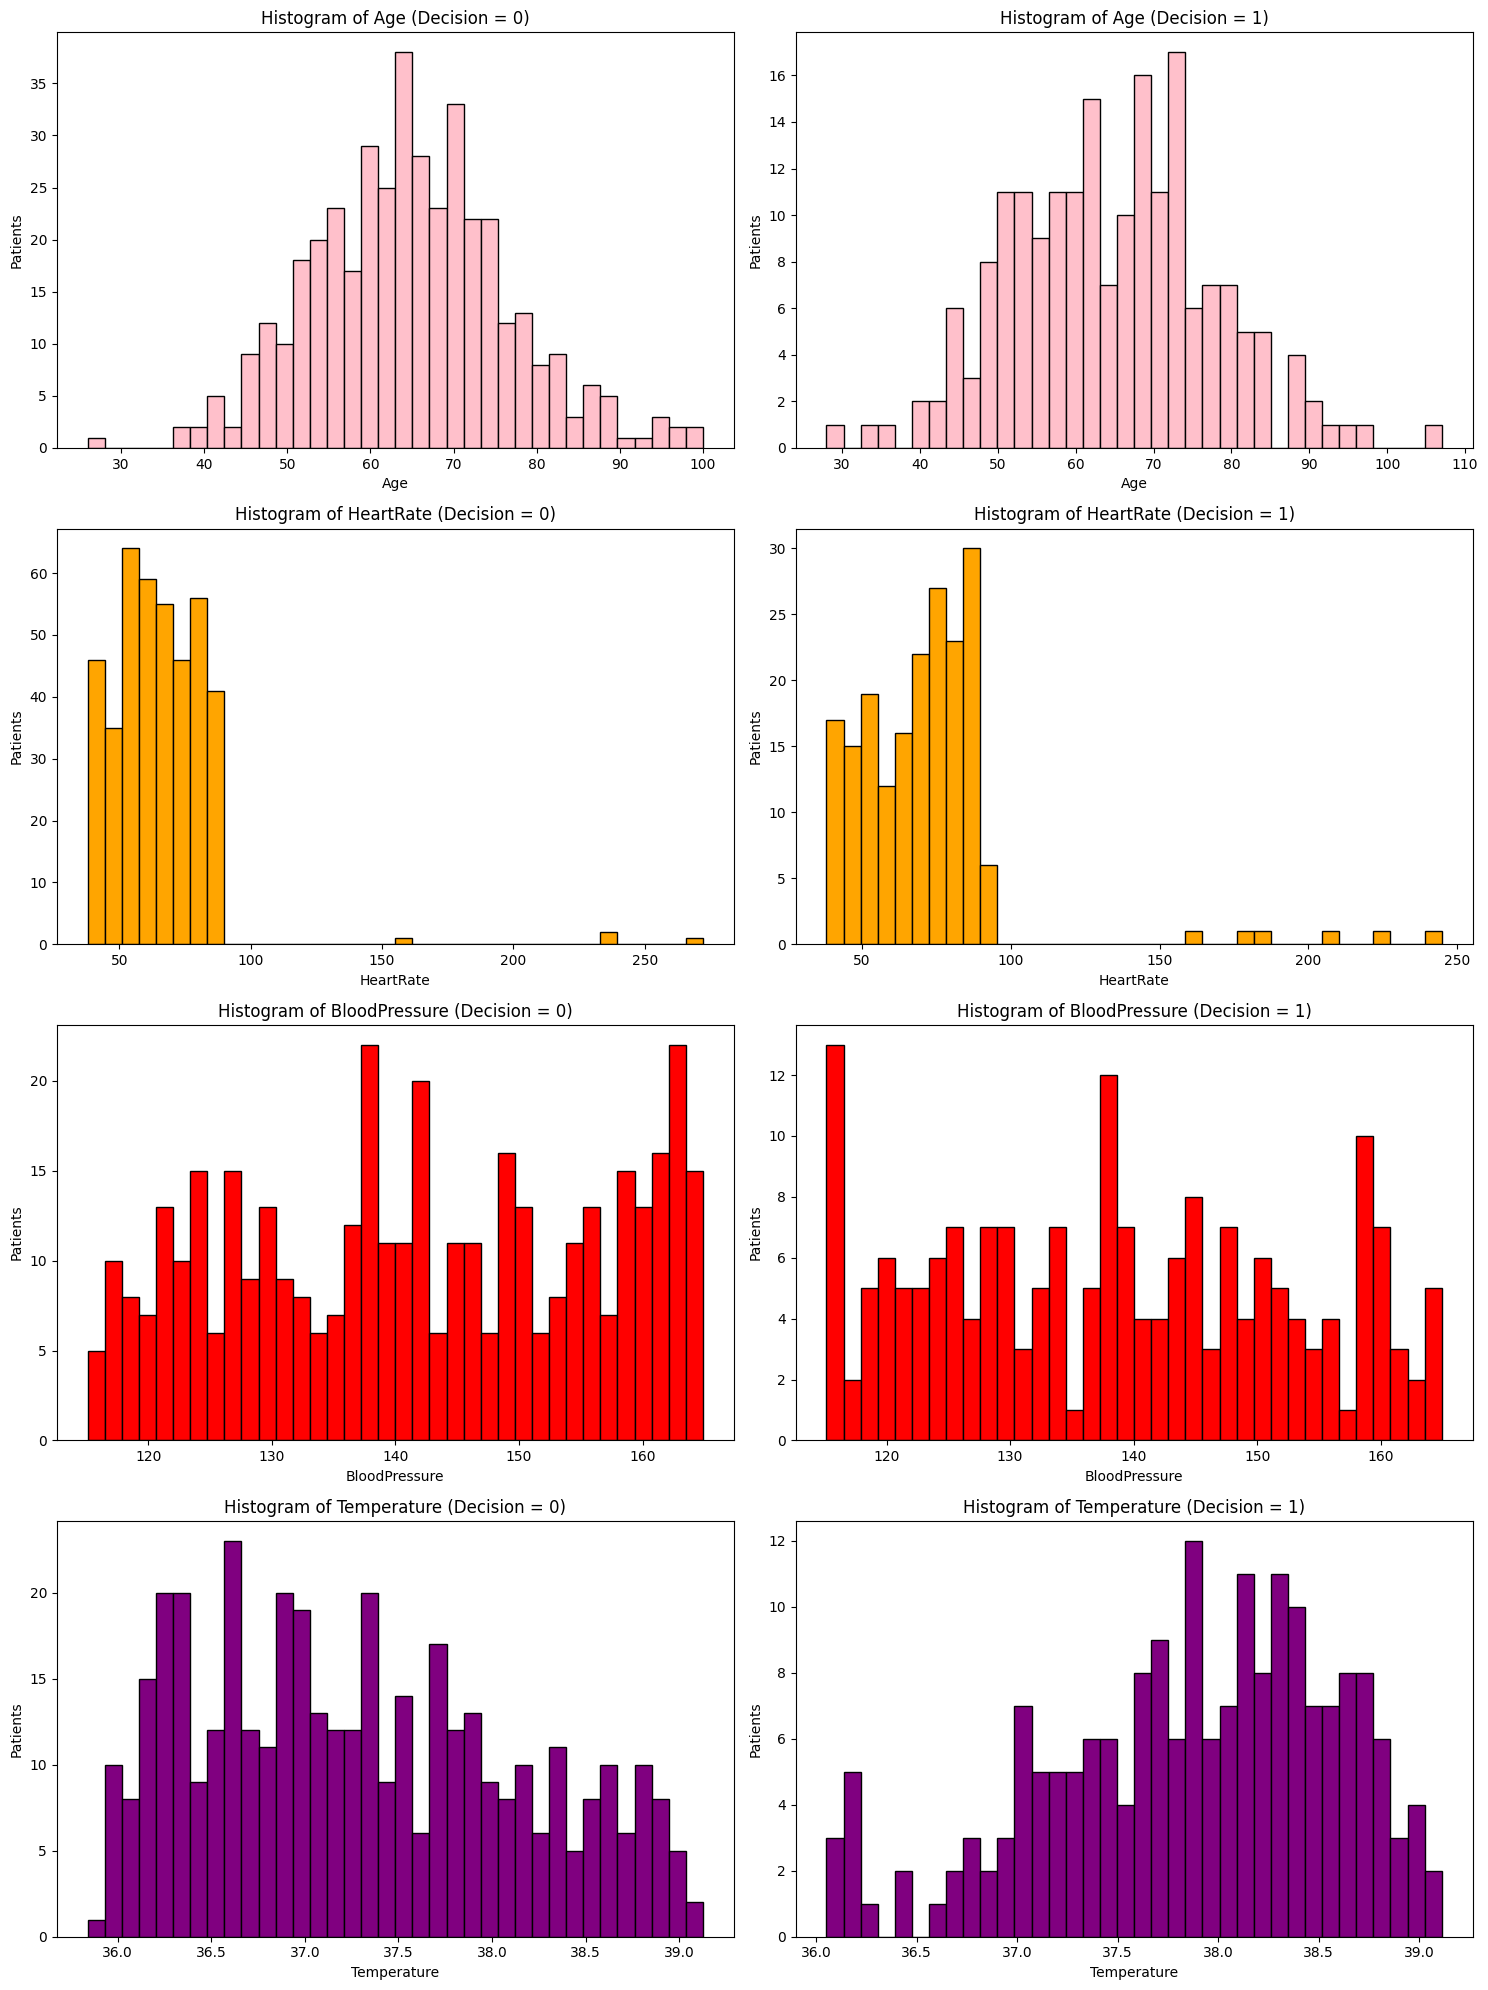

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# Histogram of Age for Decision = 0
axs[0, 0].hist(data[data['Decision'] == 0]['Age'], color='pink', edgecolor='black', bins=int(180/5))
axs[0, 0].set_title('Histogram of Age (Decision = 0)')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Patients')

# Histogram of Age for Decision = 1
axs[0, 1].hist(data[data['Decision'] == 1]['Age'], color='pink', edgecolor='black', bins=int(180/5))
axs[0, 1].set_title('Histogram of Age (Decision = 1)')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Patients')

# Histogram of HeartRate for Decision = 0
axs[1, 0].hist(data[data['Decision'] == 0]['HeartRate'], color='orange', edgecolor='black', bins=int(180/5))
axs[1, 0].set_title('Histogram of HeartRate (Decision = 0)')
axs[1, 0].set_xlabel('HeartRate')
axs[1, 0].set_ylabel('Patients')

# Histogram of HeartRate for Decision = 1
axs[1, 1].hist(data[data['Decision'] == 1]['HeartRate'], color='orange', edgecolor='black', bins=int(180/5))
axs[1, 1].set_title('Histogram of HeartRate (Decision = 1)')
axs[1, 1].set_xlabel('HeartRate')
axs[1, 1].set_ylabel('Patients')

# Histogram of BloodPressure for Decision = 0
axs[2, 0].hist(data[data['Decision'] == 0]['BloodPressure'], color='red', edgecolor='black', bins=int(180/5))
axs[2, 0].set_title('Histogram of BloodPressure (Decision = 0)')
axs[2, 0].set_xlabel('BloodPressure')
axs[2, 0].set_ylabel('Patients')

# Histogram of BloodPressure for Decision = 1
axs[2, 1].hist(data[data['Decision'] == 1]['BloodPressure'], color='red', edgecolor='black', bins=int(180/5))
axs[2, 1].set_title('Histogram of BloodPressure (Decision = 1)')
axs[2, 1].set_xlabel('BloodPressure')
axs[2, 1].set_ylabel('Patients')

# Histogram of Temperature for Decision = 0
axs[3, 0].hist(data[data['Decision'] == 0]['Temperature'], color='purple', edgecolor='black', bins=int(180/5))
axs[3, 0].set_title('Histogram of Temperature (Decision = 0)')
axs[3, 0].set_xlabel('Temperature')
axs[3, 0].set_ylabel('Patients')

# Histogram of Temperature for Decision = 1
axs[3, 1].hist(data[data['Decision'] == 1]['Temperature'], color='purple', edgecolor='black', bins=int(180/5))
axs[3, 1].set_title('Histogram of Temperature (Decision = 1)')
axs[3, 1].set_xlabel('Temperature')
axs[3, 1].set_ylabel('Patients')

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('Features_Distribution_by_Decision.png')

# Show the plot
plt.show()


/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_11471/1962037542.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Age'], color='pink', shade=True, ax=axs[0, 0])
/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_11471/1962037542.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['BloodPressure'], color='red', shade=True, ax=axs[0, 1])
/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_11471/1962037542.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['HeartRate'], color='orange', shade=True, ax=axs[1, 0])
/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_11471/1

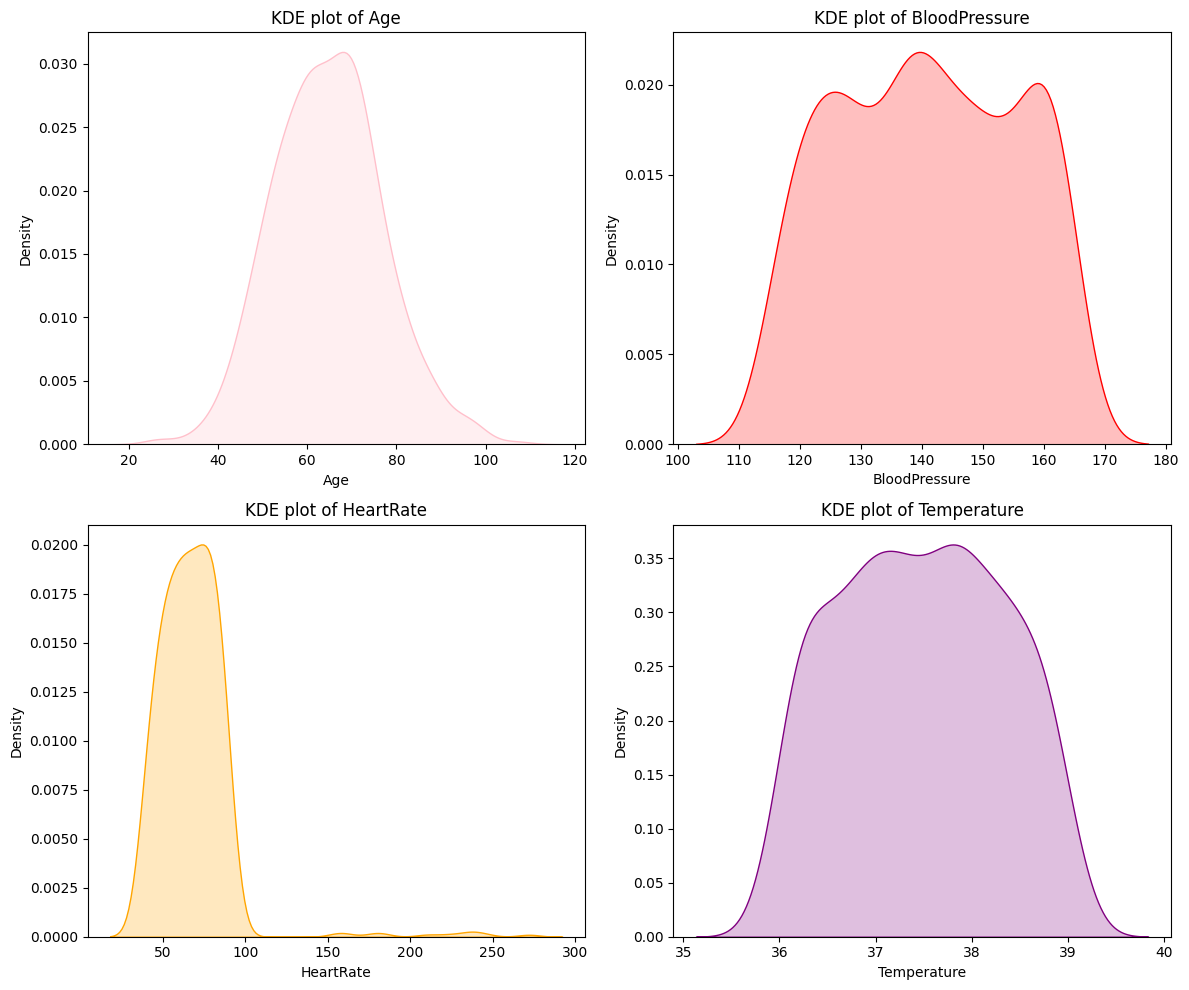

In [17]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot KDE plots for each variable
sns.kdeplot(data['Age'], color='pink', shade=True, ax=axs[0, 0])
axs[0, 0].set_title('KDE plot of Age')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Density')

sns.kdeplot(data['BloodPressure'], color='red', shade=True, ax=axs[0, 1])
axs[0, 1].set_title('KDE plot of BloodPressure')
axs[0, 1].set_xlabel('BloodPressure')
axs[0, 1].set_ylabel('Density')

sns.kdeplot(data['HeartRate'], color='orange', shade=True, ax=axs[1, 0])
axs[1, 0].set_title('KDE plot of HeartRate')
axs[1, 0].set_xlabel('HeartRate')
axs[1, 0].set_ylabel('Density')

sns.kdeplot(data['Temperature'], color='purple', shade=True, ax=axs[1, 1])
axs[1, 1].set_title('KDE plot of Temperature')
axs[1, 1].set_xlabel('Temperature')
axs[1, 1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()

plt.savefig('kde_plots.png')

# Display plot
plt.show()

/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_11471/3538556769.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Decision'] == 0]['Age'], color='pink', shade=True, ax=axs[0, 0])
/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_11471/3538556769.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Decision'] == 1]['Age'], color='magenta', shade=True, ax=axs[0, 1])
/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_11471/3538556769.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Decision'] == 0]['HeartRate'], color='yellow', shade=True, ax=axs[1, 0])
/v

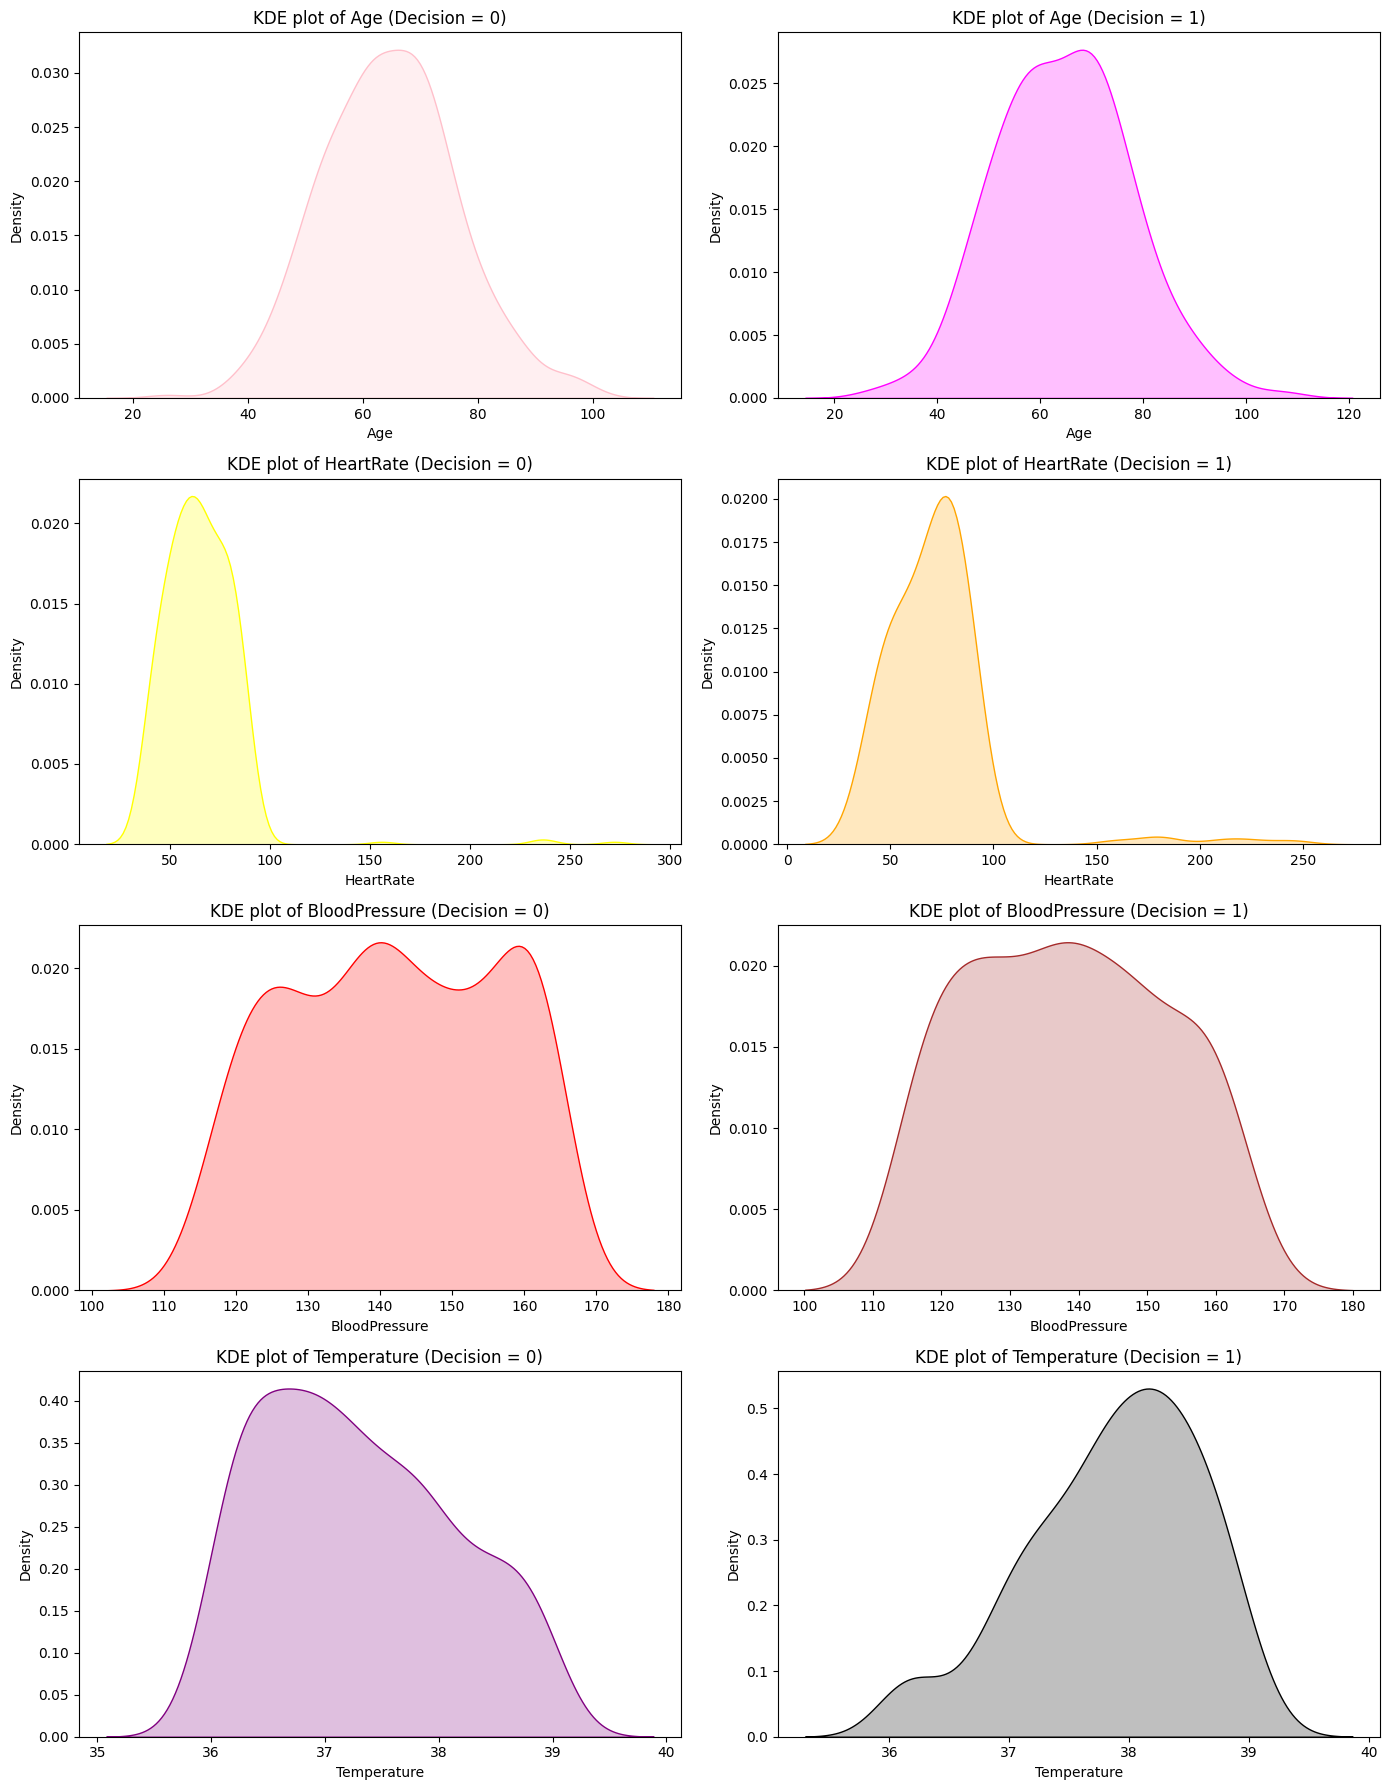

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `data` is your DataFrame and it has the columns 'Age', 'HeartRate', 'BloodPressure', 'Temperature', and 'Decision'

# Create a figure with subplots for each feature
fig, axs = plt.subplots(4, 2, figsize=(14, 18))

# KDE plots for Age
sns.kdeplot(data[data['Decision'] == 0]['Age'], color='pink', shade=True, ax=axs[0, 0])
axs[0, 0].set_title('KDE plot of Age (Decision = 0)')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Density')

sns.kdeplot(data[data['Decision'] == 1]['Age'], color='magenta', shade=True, ax=axs[0, 1])
axs[0, 1].set_title('KDE plot of Age (Decision = 1)')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Density')

# KDE plots for HeartRate
sns.kdeplot(data[data['Decision'] == 0]['HeartRate'], color='yellow', shade=True, ax=axs[1, 0])
axs[1, 0].set_title('KDE plot of HeartRate (Decision = 0)')
axs[1, 0].set_xlabel('HeartRate')
axs[1, 0].set_ylabel('Density')

sns.kdeplot(data[data['Decision'] == 1]['HeartRate'], color='orange', shade=True, ax=axs[1, 1])
axs[1, 1].set_title('KDE plot of HeartRate (Decision = 1)')
axs[1, 1].set_xlabel('HeartRate')
axs[1, 1].set_ylabel('Density')

# KDE plots for BloodPressure
sns.kdeplot(data[data['Decision'] == 0]['BloodPressure'], color='red', shade=True, ax=axs[2, 0])
axs[2, 0].set_title('KDE plot of BloodPressure (Decision = 0)')
axs[2, 0].set_xlabel('BloodPressure')
axs[2, 0].set_ylabel('Density')

sns.kdeplot(data[data['Decision'] == 1]['BloodPressure'], color='brown', shade=True, ax=axs[2, 1])
axs[2, 1].set_title('KDE plot of BloodPressure (Decision = 1)')
axs[2, 1].set_xlabel('BloodPressure')
axs[2, 1].set_ylabel('Density')

# KDE plots for Temperature
sns.kdeplot(data[data['Decision'] == 0]['Temperature'], color='purple', shade=True, ax=axs[3, 0])
axs[3, 0].set_title('KDE plot of Temperature (Decision = 0)')
axs[3, 0].set_xlabel('Temperature')
axs[3, 0].set_ylabel('Density')

sns.kdeplot(data[data['Decision'] == 1]['Temperature'], color='black', shade=True, ax=axs[3, 1])
axs[3, 1].set_title('KDE plot of Temperature (Decision = 1)')
axs[3, 1].set_xlabel('Temperature')
axs[3, 1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Save the figure as an image file (e.g., PNG)
plt.savefig('kde_plots_decisions.png')

# Display the plot (optional)
plt.show()


<h3 style="font-family:Avantgarde; font-size:2em;">3. Calculate Priors and Likelihoods</h3>

In [19]:
# Calculate Priors - Probability of Each Class
total_patients = len(data)
priors = data['Decision'].value_counts(normalize=True).to_dict()
print(priors)


{0: 0.67779632721202, 1: 0.32220367278797996}


In [20]:
discrete_features = ['Gender','MaritalStatus','Vaccinated','BreathingDifficulty','ClinicalGuidelines']
continuous_features = ['Age','HeartRate','BloodPressure','Temperature']

### Likelihood for Discrete

In [21]:
# Calculate Likelihoods for discrete features
likelihoods = {}
for feature in discrete_features:
    feature_likelihoods = data.groupby([feature,'Decision']).size().unstack().fillna(0)
    feature_likelihoods = feature_likelihoods.apply(lambda x: x/x.sum(), axis=1)
    likelihoods[feature] = feature_likelihoods.to_dict()
    print(feature)
    print(feature_likelihoods)
    print('\n')

Gender
Decision         0         1
Gender                      
0         0.809859  0.190141
1         0.558730  0.441270


MaritalStatus
Decision              0         1
MaritalStatus                    
0              0.710884  0.289116
1              0.645902  0.354098


Vaccinated
Decision           0         1
Vaccinated                    
0           0.496732  0.503268
1           0.866894  0.133106


BreathingDifficulty
Decision                    0         1
BreathingDifficulty                    
0                    0.807947  0.192053
1                    0.741722  0.258278
2                    0.627586  0.372414
3                    0.532895  0.467105


ClinicalGuidelines
Decision                   0         1
ClinicalGuidelines                    
0                   0.741201  0.258799
1                   0.413793  0.586207




### Likelihood for Continuous

In [22]:
# Calculate Likelihoods for continuous features
for feature in continuous_features:
    feature_likelihoods = data.groupby('Decision')[feature].agg([np.mean, np.std])
    likelihoods[feature] = feature_likelihoods.to_dict()
    print(feature)
    print(feature_likelihoods)
    print('\n')

Age
               mean        std
Decision                      
0         64.709360  11.766840
1         64.580311  13.072515


HeartRate
               mean        std
Decision                      
0         65.703689  21.762866
1         72.140989  28.034471


BloodPressure
                mean        std
Decision                       
0         141.906836  14.484498
1         138.470530  14.338269


Temperature
               mean       std
Decision                     
0         37.290987  0.843831
1         37.863012  0.719061




/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_11471/257438214.py:3: FutureWarning: The provided callable <function mean at 0x1086c8cc0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  feature_likelihoods = data.groupby('Decision')[feature].agg([np.mean, np.std])
/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_11471/257438214.py:3: FutureWarning: The provided callable <function std at 0x1086c8e00> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  feature_likelihoods = data.groupby('Decision')[feature].agg([np.mean, np.std])
/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_11471/257438214.py:3: FutureWarning: The provided callable <function mean at 0x1086c8cc0> is currently using SeriesGroupBy.mean. In a future

## Evidences

In [23]:
#Evidences
# Continuous
cont_evidences = data[continuous_features].agg([np.mean, np.std]).to_dict()
print(cont_evidences)

# Discrete
disc_evidences = data[discrete_features].agg([pd.Series.mode]).to_dict()
print(disc_evidences)

{'Age': {'mean': 64.6677796327212, 'std': 12.191949215106321}, 'HeartRate': {'mean': 67.77781078464108, 'std': 24.12816657472998}, 'BloodPressure': {'mean': 140.79964570951586, 'std': 14.514810210709872}, 'Temperature': {'mean': 37.47529580467445, 'std': 0.848427759027945}}
{('Gender', 'mode'): {0: 1}, ('MaritalStatus', 'mode'): {0: 1}, ('Vaccinated', 'mode'): {0: 0}, ('BreathingDifficulty', 'mode'): {0: 3}, ('ClinicalGuidelines', 'mode'): {0: '0'}}


/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_11471/1426698624.py:3: FutureWarning: The provided callable <function mean at 0x1086c8cc0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  cont_evidences = data[continuous_features].agg([np.mean, np.std]).to_dict()
/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_11471/1426698624.py:3: FutureWarning: The provided callable <function std at 0x1086c8e00> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  cont_evidences = data[continuous_features].agg([np.mean, np.std]).to_dict()


<h3 style="font-family:Avantgarde; font-size:2em;">4. Predictions</h3>

In [25]:
from sklearn.metrics import classification_report, accuracy_score
def bayes_discrete(row, data):
    row = row[discrete_features]
    result = 1
    for name, value in row.items():
        count = data[data[name] == value].shape[0]
        result *= (count/data.shape[0])
    return result

def bayes_continuous(row, data):
    row = row[continuous_features]
    result = 1
    for name, value in row.items():
        mean = hospital[name].mean()
        std = hospital[name].std()
        prob = norm.cdf(value, mean, std)
        result *= prob
    return result

def bayes(row, f):
    data_t = hospital if f else home
    prob_discrete, prob_continuous = bayes_discrete(row, data_t), bayes_continuous(row, data_t)
    return prob_discrete * prob_continuous * (len(data_t)/len(data))

def predict(row):
    prob_hospital, prob_home = bayes(row, True), bayes(row, False)
    return 1 if prob_hospital > prob_home else 0

data['Predicted'] = data.apply(predict, axis=1)
data['Correct'] = data['Decision'] == data['Predicted']
data['Correct'].value_counts(normalize=True)


Correct
True     0.803005
False    0.196995
Name: proportion, dtype: float64

<h3 style="font-family:Avantgarde; font-size:2em;">5. First Evaluation with All Features</h3>

In [26]:
# Confusion Matrix
confusion_matrix = data.groupby(['Decision','Predicted']).size().unstack().fillna(0)
confusion_matrix

Predicted,0,1
Decision,,
0,370,36
1,82,111


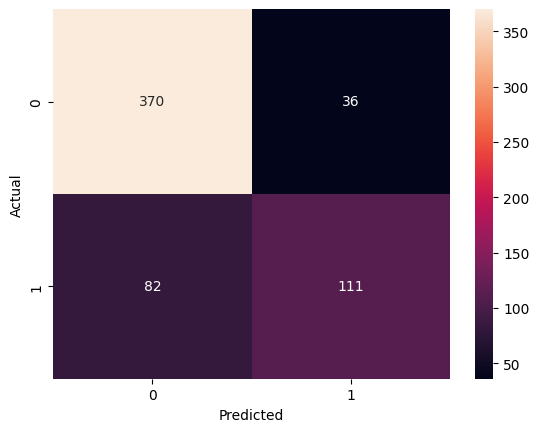

In [27]:
# Heatmap
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
print(classification_report(data['Decision'], data['Predicted']))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       406
           1       0.76      0.58      0.65       193

    accuracy                           0.80       599
   macro avg       0.79      0.74      0.76       599
weighted avg       0.80      0.80      0.79       599



<h3 style="font-family:Avantgarde; font-size:2em;">6. Evaluation of the Performance with Features Taken Out</h3>

### Take 1 Feature Out

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Define a function to train and predict with your model
def train_and_predict(data):
    #Drop the Predicted and Correct columns
    #data = data.drop(['Predicted', 'Correct'], axis=1)
    X = data.drop('Decision', axis=1)
    y = data['Decision']
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize model (you can use any model you prefer)
    model = GaussianNB()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Iterate over each feature (excluding 'Decision')
for feature in data.columns:
    if feature == 'Decision' or feature == 'Predicted' or feature == 'Correct':
        continue
    
    # Make a copy of the original data without the current feature
    reduced_data = data.drop(feature, axis=1)
    
    # Calculate accuracy with the reduced dataset
    accuracy = train_and_predict(reduced_data)
    
    print(f'Accuracy without {feature}: {accuracy}')


Accuracy without Gender: 0.9083333333333333
Accuracy without Age: 0.9083333333333333
Accuracy without MaritalStatus: 0.9083333333333333
Accuracy without Vaccinated: 0.8416666666666667
Accuracy without BreathingDifficulty: 0.9083333333333333
Accuracy without HeartRate: 0.9083333333333333
Accuracy without BloodPressure: 0.9
Accuracy without Temperature: 0.9166666666666666
Accuracy without ClinicalGuidelines: 0.9166666666666666


### Take 2 Features Out

In [30]:
from itertools import combinations
# Define a function to train and predict with GaussianNB model
def train_and_predict(data):
    data = data.drop(['Predicted', 'Correct'], axis=1)
    X = data.drop('Decision', axis=1)
    y = data['Decision']
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize GaussianNB model
    model = GaussianNB()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Get all combinations of feature pairs to remove
all_features = list(data.columns)
all_features.remove('Decision')  # Remove the target variable 'Decision'
all_features.remove('Predicted')  # Remove the predicted variable 'Predicted'
all_features.remove('Correct')  # Remove the correct variable 'Correct'

results = []

# Generate combinations of features to remove (pairs)
for combo in combinations(all_features, 2):
    # Make a copy of the original data without the current pair of features
    reduced_data = data.drop(list(combo), axis=1)
    
    # Calculate accuracy with the reduced dataset
    accuracy = train_and_predict(reduced_data)
    
    # Store results
    results.append({
        'Features Removed': combo,
        'Accuracy': accuracy
    })

# Convert results to DataFrame for better visualization
results_data = pd.DataFrame(results)

# Display results sorted by accuracy
results_data = results_data.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(results_data)

                             Features Removed  Accuracy
0                   (Age, ClinicalGuidelines)  0.850000
1         (BloodPressure, ClinicalGuidelines)  0.841667
2   (BreathingDifficulty, ClinicalGuidelines)  0.833333
3         (MaritalStatus, ClinicalGuidelines)  0.825000
4             (HeartRate, ClinicalGuidelines)  0.816667
5                (Gender, ClinicalGuidelines)  0.808333
6           (Temperature, ClinicalGuidelines)  0.800000
7            (Vaccinated, ClinicalGuidelines)  0.775000
8                          (Age, Temperature)  0.725000
9                            (Age, HeartRate)  0.725000
10         (BreathingDifficulty, Temperature)  0.708333
11               (BloodPressure, Temperature)  0.708333
12                   (HeartRate, Temperature)  0.700000
13       (BreathingDifficulty, BloodPressure)  0.700000
14                       (Age, MaritalStatus)  0.691667
15                       (Age, BloodPressure)  0.691667
16                 (HeartRate, BloodPressure)  0

### Take 3 Features Out

In [31]:
from itertools import combinations
# Define a function to train and predict with GaussianNB model
def train_and_predict(data):
    data = data.drop(['Predicted', 'Correct'], axis=1)
    X = data.drop('Decision', axis=1)
    y = data['Decision']
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize GaussianNB model
    model = GaussianNB()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Get all combinations of feature pairs to remove
all_features = list(data.columns)
all_features.remove('Decision')  # Remove the target variable 'Decision'
all_features.remove('Predicted')  # Remove the predicted variable 'Predicted'
all_features.remove('Correct')  # Remove the correct variable 'Correct'

results = []

# Generate combinations of features to remove (pairs)
for combo in combinations(all_features, 3):
    # Make a copy of the original data without the current pair of features
    reduced_data = data.drop(list(combo), axis=1)
    
    # Calculate accuracy with the reduced dataset
    accuracy = train_and_predict(reduced_data)
    
    # Store results
    results.append({
        'Features Removed': combo,
        'Accuracy': accuracy
    })

# Convert results to DataFrame for better visualization
results_data = pd.DataFrame(results)

# Display results sorted by accuracy
results_data = results_data.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(results_data)

                                     Features Removed  Accuracy
0            (Age, BloodPressure, ClinicalGuidelines)  0.866667
1            (Age, MaritalStatus, ClinicalGuidelines)  0.858333
2   (MaritalStatus, BloodPressure, ClinicalGuideli...  0.841667
3                (Age, HeartRate, ClinicalGuidelines)  0.841667
4                   (Gender, Age, ClinicalGuidelines)  0.841667
..                                                ...       ...
79                 (Gender, MaritalStatus, HeartRate)  0.633333
80                    (Gender, Vaccinated, HeartRate)  0.625000
81               (Gender, MaritalStatus, Temperature)  0.625000
82               (Gender, BloodPressure, Temperature)  0.625000
83         (Gender, BreathingDifficulty, Temperature)  0.616667

[84 rows x 2 columns]


### Take 4 Features Out

In [32]:
from itertools import combinations
# Define a function to train and predict with GaussianNB model
def train_and_predict(data):
    data = data.drop(['Predicted', 'Correct'], axis=1)
    X = data.drop('Decision', axis=1)
    y = data['Decision']
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize GaussianNB model
    model = GaussianNB()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Get all combinations of feature pairs to remove
all_features = list(data.columns)
all_features.remove('Decision')  # Remove the target variable 'Decision'
all_features.remove('Predicted')  # Remove the predicted variable 'Predicted'
all_features.remove('Correct')  # Remove the correct variable 'Correct'

results = []

# Generate combinations of features to remove (pairs)
for combo in combinations(all_features, 4):
    # Make a copy of the original data without the current pair of features
    reduced_data = data.drop(list(combo), axis=1)
    
    # Calculate accuracy with the reduced dataset
    accuracy = train_and_predict(reduced_data)
    
    # Store results
    results.append({
        'Features Removed': combo,
        'Accuracy': accuracy
    })

# Convert results to DataFrame for better visualization
results_data = pd.DataFrame(results)

# Display results sorted by accuracy
results_data = results_data.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(results_data)

                                      Features Removed  Accuracy
0    (Age, MaritalStatus, BloodPressure, ClinicalGu...  0.875000
1    (Age, BreathingDifficulty, BloodPressure, Clin...  0.858333
2    (Age, HeartRate, BloodPressure, ClinicalGuidel...  0.850000
3         (Gender, Age, HeartRate, ClinicalGuidelines)  0.850000
4     (Gender, Age, BloodPressure, ClinicalGuidelines)  0.841667
..                                                 ...       ...
121  (Gender, Vaccinated, BreathingDifficulty, Hear...  0.625000
122    (Gender, MaritalStatus, HeartRate, Temperature)  0.625000
123  (Gender, MaritalStatus, BloodPressure, Tempera...  0.616667
124  (Gender, MaritalStatus, BreathingDifficulty, T...  0.608333
125  (Gender, BreathingDifficulty, HeartRate, Tempe...  0.591667

[126 rows x 2 columns]


### Take 5 Features Out

In [33]:
from itertools import combinations
# Define a function to train and predict with GaussianNB model
def train_and_predict(data):
    data = data.drop(['Predicted', 'Correct'], axis=1)
    X = data.drop('Decision', axis=1)
    y = data['Decision']
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize GaussianNB model
    model = GaussianNB()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Get all combinations of feature pairs to remove
all_features = list(data.columns)
all_features.remove('Decision')  # Remove the target variable 'Decision'
all_features.remove('Predicted')  # Remove the predicted variable 'Predicted'
all_features.remove('Correct')  # Remove the correct variable 'Correct'

results = []

# Generate combinations of features to remove (pairs)
for combo in combinations(all_features, 5):
    # Make a copy of the original data without the current pair of features
    reduced_data = data.drop(list(combo), axis=1)
    
    # Calculate accuracy with the reduced dataset
    accuracy = train_and_predict(reduced_data)
    
    # Store results
    results.append({
        'Features Removed': combo,
        'Accuracy': accuracy
    })

# Convert results to DataFrame for better visualization
results_data = pd.DataFrame(results)

# Display results sorted by accuracy
results_data = results_data.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(results_data)

                                      Features Removed  Accuracy
0    (Age, MaritalStatus, HeartRate, BloodPressure,...  0.866667
1    (Gender, Age, MaritalStatus, BloodPressure, Cl...  0.858333
2    (Age, MaritalStatus, BreathingDifficulty, Bloo...  0.850000
3    (Gender, Age, MaritalStatus, HeartRate, Clinic...  0.850000
4    (Age, BreathingDifficulty, HeartRate, BloodPre...  0.841667
..                                                 ...       ...
121  (MaritalStatus, Vaccinated, BreathingDifficult...  0.625000
122  (Gender, MaritalStatus, Vaccinated, HeartRate,...  0.625000
123  (Gender, MaritalStatus, Vaccinated, BreathingD...  0.616667
124  (Gender, MaritalStatus, BreathingDifficulty, H...  0.608333
125  (Gender, BreathingDifficulty, HeartRate, Blood...  0.600000

[126 rows x 2 columns]


### Take 6 Features Out

In [34]:
from itertools import combinations
# Define a function to train and predict with GaussianNB model
def train_and_predict(data):
    data = data.drop(['Predicted', 'Correct'], axis=1)
    X = data.drop('Decision', axis=1)
    y = data['Decision']
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize GaussianNB model
    model = GaussianNB()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Get all combinations of feature pairs to remove
all_features = list(data.columns)
all_features.remove('Decision')  # Remove the target variable 'Decision'
all_features.remove('Predicted')  # Remove the predicted variable 'Predicted'
all_features.remove('Correct')  # Remove the correct variable 'Correct'

results = []

# Generate combinations of features to remove (pairs)
for combo in combinations(all_features, 6):
    # Make a copy of the original data without the current pair of features
    reduced_data = data.drop(list(combo), axis=1)
    
    # Calculate accuracy with the reduced dataset
    accuracy = train_and_predict(reduced_data)
    
    # Store results
    results.append({
        'Features Removed': combo,
        'Accuracy': accuracy
    })

# Convert results to DataFrame for better visualization
results_data = pd.DataFrame(results)

# Display results sorted by accuracy
results_data = results_data.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(results_data)

                                     Features Removed  Accuracy
0   (Gender, Age, MaritalStatus, HeartRate, BloodP...  0.850000
1   (Age, MaritalStatus, BreathingDifficulty, Hear...  0.841667
2   (Gender, Age, BreathingDifficulty, HeartRate, ...  0.808333
3   (Age, MaritalStatus, HeartRate, BloodPressure,...  0.808333
4   (Age, MaritalStatus, BreathingDifficulty, Hear...  0.800000
..                                                ...       ...
79  (Gender, Vaccinated, BreathingDifficulty, Hear...  0.633333
80  (Age, MaritalStatus, Vaccinated, BreathingDiff...  0.633333
81  (Age, MaritalStatus, Vaccinated, BreathingDiff...  0.633333
82  (Gender, MaritalStatus, Vaccinated, BreathingD...  0.625000
83  (Gender, MaritalStatus, BreathingDifficulty, H...  0.608333

[84 rows x 2 columns]


### Take 7 Features Out

In [35]:
from itertools import combinations
# Define a function to train and predict with GaussianNB model
def train_and_predict(data):
    data = data.drop(['Predicted', 'Correct'], axis=1)
    X = data.drop('Decision', axis=1)
    y = data['Decision']
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize GaussianNB model
    model = GaussianNB()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Get all combinations of feature pairs to remove
all_features = list(data.columns)
all_features.remove('Decision')  # Remove the target variable 'Decision'
all_features.remove('Predicted')  # Remove the predicted variable 'Predicted'
all_features.remove('Correct')  # Remove the correct variable 'Correct'

results = []

# Generate combinations of features to remove (pairs)
for combo in combinations(all_features, 7):
    # Make a copy of the original data without the current pair of features
    reduced_data = data.drop(list(combo), axis=1)
    
    # Calculate accuracy with the reduced dataset
    accuracy = train_and_predict(reduced_data)
    
    # Store results
    results.append({
        'Features Removed': combo,
        'Accuracy': accuracy
    })

# Convert results to DataFrame for better visualization
results_data = pd.DataFrame(results)

# Display results sorted by accuracy
results_data = results_data.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(results_data)

                                     Features Removed  Accuracy
0   (Age, MaritalStatus, BreathingDifficulty, Hear...  0.800000
1   (Gender, Age, MaritalStatus, BreathingDifficul...  0.791667
2   (Age, MaritalStatus, Vaccinated, HeartRate, Bl...  0.758333
3   (Gender, Age, MaritalStatus, HeartRate, BloodP...  0.750000
4   (Age, MaritalStatus, Vaccinated, BreathingDiff...  0.733333
5   (Gender, Age, BreathingDifficulty, HeartRate, ...  0.733333
6   (Gender, Age, MaritalStatus, BreathingDifficul...  0.725000
7   (Gender, Age, MaritalStatus, BreathingDifficul...  0.716667
8   (Gender, Age, MaritalStatus, Vaccinated, Heart...  0.708333
9   (Gender, Age, Vaccinated, BreathingDifficulty,...  0.700000
10  (Age, MaritalStatus, Vaccinated, BreathingDiff...  0.700000
11  (Gender, MaritalStatus, Vaccinated, BreathingD...  0.700000
12  (MaritalStatus, Vaccinated, BreathingDifficult...  0.700000
13  (Gender, Age, MaritalStatus, Vaccinated, Breat...  0.700000
14  (Gender, Age, MaritalStatus, Vaccina

### Take 8 Features Out

In [36]:
from itertools import combinations
# Define a function to train and predict with GaussianNB model
def train_and_predict(data):
    data = data.drop(['Predicted', 'Correct'], axis=1)
    X = data.drop('Decision', axis=1)
    y = data['Decision']
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize GaussianNB model
    model = GaussianNB()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Get all combinations of feature pairs to remove
all_features = list(data.columns)
all_features.remove('Decision')  # Remove the target variable 'Decision'
all_features.remove('Predicted')  # Remove the predicted variable 'Predicted'
all_features.remove('Correct')  # Remove the correct variable 'Correct'

results = []

# Generate combinations of features to remove (pairs)
for combo in combinations(all_features, 8):
    # Make a copy of the original data without the current pair of features
    reduced_data = data.drop(list(combo), axis=1)
    
    # Calculate accuracy with the reduced dataset
    accuracy = train_and_predict(reduced_data)
    
    # Store results
    results.append({
        'Features Removed': combo,
        'Accuracy': accuracy
    })

# Convert results to DataFrame for better visualization
results_data = pd.DataFrame(results)

# Display results sorted by accuracy
results_data = results_data.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(results_data)

                                    Features Removed  Accuracy
0  (Gender, Age, MaritalStatus, Vaccinated, Breat...  0.700000
1  (Gender, Age, MaritalStatus, Vaccinated, Breat...  0.691667
2  (Gender, Age, MaritalStatus, Vaccinated, Heart...  0.691667
3  (Gender, Age, Vaccinated, BreathingDifficulty,...  0.691667
4  (Age, MaritalStatus, Vaccinated, BreathingDiff...  0.691667
5  (Gender, Age, MaritalStatus, BreathingDifficul...  0.675000
6  (Gender, Age, MaritalStatus, Vaccinated, Breat...  0.666667
7  (Gender, MaritalStatus, Vaccinated, BreathingD...  0.666667
8  (Gender, Age, MaritalStatus, Vaccinated, Breat...  0.633333
